In [244]:
# Import Dependencies
import numpy as np
import pandas as pd
import os

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import csv
from matplotlib import pyplot as plt
import scipy.stats as st
import seaborn as sns

In [245]:
# Shortened the process into a loop for pulling Stock Data
stockstring = ['SPY', 'QQQ', 'VTI', 'XLK', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU']
stockstring_expl = ['SPY - S&P500 ETF', 'QQQ - NASDAQ-100 Index', 'VTI - Vanguard Total Stock Market Index Fund', 'XLK - Technology Select Sector SPDR Fund', 'XLY - Consumer Cyclical/Consumer Discretionary', 'XLP - Consumer Defensive/Consumer Staples', 'XLV - Healthcare', 'XLI - Industrials', 'XLF - Financials', 'VNQ - Real Estate', 'XLE - Energy', 'XLU - Utilities']

start = '2012-01-01'
end = '2022-01-01'

stockslist = {}
for x in stockstring:
    stockslist[x] = pdr.get_data_yahoo(x, start=start, end=end)

#Create Individual DataFrame Variables for each Stock
SPY, QQQ, VTI, XLK, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU = [stockslist[x] for x in stockstring]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [246]:
# Import suplemental CSV for Market Cap Sectors.
file = 'constituents-financials_csv.csv'
file_path = os.path.join("data", "constituents-financials_csv.csv")
spreadsheet = pd.read_csv(file_path)

In [247]:
# Add a array of those stock sybmols for later loops.
stockslist1 = [VTI, QQQ, SPY, XLK, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU]
tickers1 = ['SPY', 'QQQ', 'VTI']

In [248]:
# Reset the index for all Stock Ticker DataFrames.
for xyz in stockslist1:
    xyz.reset_index(inplace=True)

In [249]:
# Adding a Column Called Ticker to Each DataFrame using the Tickers in our Libraries above.
for xy, ticker in zip(stockslist1, stockstring):
    xy["Ticker"] = ticker

In [250]:
# Create a Column called PercentChange that tracks progress of each ETF over time.
for o in stockslist1:
    stock_pct_change = o['Close'].pct_change()
    o["PercentChange"] = (stock_pct_change.add(1).cumprod().subtract(1))*100
    o.fillna(0, inplace=True)

In [251]:
# Generate the Rate of Return for all stock ETF tickers we have using the Rate of Return formula.
SPY_end_price = SPY.Close.iloc[-1]
SPY_start_price = SPY.Close.iloc[0]
SPY_10_year_return = ((SPY_end_price / SPY_start_price - 1) * 100)/10
#5 year return calculation
SPY_5_year_return = ((SPY.Close.iloc[-1] / SPY.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
SPY_3_year_return = ((SPY.Close.iloc[-1] / SPY.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
SPY_1_year_return = ((SPY.Close.iloc[-1] / SPY.Close.iloc[-252] - 1) * 100)
QQQ_end_price = QQQ.Close.iloc[-1]
QQQ_start_price = QQQ.Close.iloc[0]
QQQ_10_year_return = ((QQQ_end_price / QQQ_start_price - 1) * 100)/10
#5 year return calculation
QQQ_5_year_return = ((QQQ.Close.iloc[-1] / QQQ.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
QQQ_3_year_return = ((QQQ.Close.iloc[-1] / QQQ.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
QQQ_1_year_return = ((QQQ.Close.iloc[-1] / QQQ.Close.iloc[-252] - 1) * 100)
# Do the same for XLK
VTI_end_price = VTI.Close.iloc[-1]
VTI_start_price = VTI.Close.iloc[0]
VTI_10_year_return = ((VTI_end_price / VTI_start_price - 1) * 100)/10
#5 year return calculation
VTI_5_year_return = ((VTI.Close.iloc[-1] / VTI.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
VTI_3_year_return = ((VTI.Close.iloc[-1] / VTI.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
VTI_1_year_return = ((VTI.Close.iloc[-1] / VTI.Close.iloc[-252] - 1) * 100)
# Do the same for XLK
XLK_end_price = XLK.Close.iloc[-1]
XLK_start_price = XLK.Close.iloc[0]
XLK_10_year_return = ((XLK_end_price / XLK_start_price - 1) * 100)/10
#5 year return calculation
XLK_5_year_return = ((XLK.Close.iloc[-1] / XLK.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLK_3_year_return = ((XLK.Close.iloc[-1] / XLK.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLK_1_year_return = ((XLK.Close.iloc[-1] / XLK.Close.iloc[-252] - 1) * 100)
# Do the same for XLY
XLY_end_price = XLY.Close.iloc[-1]
XLY_start_price = XLY.Close.iloc[0]
XLY_10_year_return = ((XLY_end_price / XLY_start_price - 1) * 100)/10
#5 year return calculation
XLY_5_year_return = ((XLY.Close.iloc[-1] / XLY.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLY_3_year_return = ((XLY.Close.iloc[-1] / XLY.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLY_1_year_return = ((XLY.Close.iloc[-1] / XLY.Close.iloc[-252] - 1) * 100)
#Do the same for XLP
XLP_end_price = XLP.Close.iloc[-1]
XLP_start_price = XLP.Close.iloc[0]
XLP_10_year_return = ((XLP_end_price / XLP_start_price - 1) * 100)/10
#5 year return calculation
XLP_5_year_return = ((XLP.Close.iloc[-1] / XLP.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLP_3_year_return = ((XLP.Close.iloc[-1] / XLP.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLP_1_year_return = ((XLP.Close.iloc[-1] / XLP.Close.iloc[-252] - 1) * 100)
#Do the same for XLV
XLV_end_price = XLV.Close.iloc[-1]
XLV_start_price = XLV.Close.iloc[0]
XLV_10_year_return = ((XLV_end_price / XLV_start_price - 1) * 100)/10
#5 year return calculation
XLV_5_year_return = ((XLV.Close.iloc[-1] / XLV.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLV_3_year_return = ((XLV.Close.iloc[-1] / XLV.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLV_1_year_return = ((XLV.Close.iloc[-1] / XLV.Close.iloc[-252] - 1) * 100)
# Do the same for XLI
XLI_end_price = XLI.Close.iloc[-1]
XLI_start_price = XLI.Close.iloc[0]
XLI_10_year_return = ((XLI_end_price / XLI_start_price - 1) * 100)/10
#5 year return calculation
XLI_5_year_return = ((XLI.Close.iloc[-1] / XLI.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLI_3_year_return = ((XLI.Close.iloc[-1] / XLI.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLI_1_year_return = ((XLI.Close.iloc[-1] / XLI.Close.iloc[-252] - 1) * 100)
# Do the same for XLF
XLF_end_price = XLF.Close.iloc[-1]
XLF_start_price = XLF.Close.iloc[0]
XLF_10_year_return = ((XLF_end_price / XLF_start_price - 1) * 100)/10
#5 year return calculation
XLF_5_year_return = ((XLF.Close.iloc[-1] / XLF.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLF_3_year_return = ((XLF.Close.iloc[-1] / XLF.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLF_1_year_return = ((XLF.Close.iloc[-1] / XLF.Close.iloc[-252] - 1) * 100)
# Do the same for VNQ
VNQ_end_price = VNQ.Close.iloc[-1]
VNQ_start_price = VNQ.Close.iloc[0]
VNQ_10_year_return = ((VNQ_end_price / VNQ_start_price - 1) * 100)/10
#5 year return calculation
VNQ_5_year_return = ((VNQ.Close.iloc[-1] / VNQ.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
VNQ_3_year_return = ((VNQ.Close.iloc[-1] / VNQ.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
VNQ_1_year_return = ((VNQ.Close.iloc[-1] / VNQ.Close.iloc[-252] - 1) * 100)
# Do the same for VNQ
XLE_end_price = XLE.Close.iloc[-1]
XLE_start_price = XLE.Close.iloc[0]
XLE_10_year_return = ((XLE_end_price / XLE_start_price - 1) * 100)/10
#5 year return calculation
XLE_5_year_return = ((XLE.Close.iloc[-1] / XLE.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLE_3_year_return = ((XLE.Close.iloc[-1] / XLE.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLE_1_year_return = ((XLE.Close.iloc[-1] / XLE.Close.iloc[-252] - 1) * 100)
# Do the same for XLU
XLU_end_price = XLU.Close.iloc[-1]
XLU_start_price = XLU.Close.iloc[0]
XLU_10_year_return = ((XLU_end_price / XLU_start_price - 1) * 100)/10
#5 year return calculation
XLU_5_year_return = ((XLU.Close.iloc[-1] / XLU.Close.iloc[-1260] - 1) * 100)/5
#3 year return calculation
XLU_3_year_return = ((XLU.Close.iloc[-1] / XLU.Close.iloc[-756] - 1) * 100)/3
#1 year return calculation
XLU_1_year_return = ((XLU.Close.iloc[-1] / XLU.Close.iloc[-252] - 1) * 100)

In [252]:
# Make a DataFrame for the returns for 10,5,3,1 years for all Tickers.
returns_10_5_3_1 = pd.DataFrame({'10 Year Yearly Rate of Return': [SPY_10_year_return, QQQ_10_year_return, VTI_10_year_return, XLK_10_year_return, XLY_10_year_return, XLP_10_year_return, XLV_10_year_return, XLI_10_year_return, XLF_10_year_return, VNQ_10_year_return, XLE_10_year_return, XLU_10_year_return],
                        '5 Year Yearly Rate of Return': [SPY_5_year_return, QQQ_5_year_return, VTI_5_year_return, XLK_5_year_return, XLY_5_year_return, XLP_5_year_return, XLV_5_year_return, XLI_5_year_return, XLF_5_year_return, VNQ_5_year_return, XLE_5_year_return, XLU_5_year_return],
                        '3 Year Yearly Rate of Return': [SPY_3_year_return, QQQ_3_year_return, VTI_3_year_return, XLK_3_year_return, XLY_3_year_return, XLP_3_year_return, XLV_3_year_return, XLI_3_year_return, XLF_3_year_return, VNQ_3_year_return, XLE_3_year_return, XLU_3_year_return],
                        '1 Year Yearly Rate of Return': [SPY_1_year_return, QQQ_1_year_return, VTI_1_year_return, XLK_1_year_return, XLY_1_year_return, XLP_1_year_return, XLV_1_year_return, XLI_1_year_return, XLF_1_year_return, VNQ_1_year_return, XLE_1_year_return, XLU_1_year_return]})

returns_10_5_3_1.index = ['SPY', 'QQQ', 'VTI', 'XLK', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU']

returns_10_5_3_1.head(12)

,10 Year Yearly Rate of Return,5 Year Yearly Rate of Return,3 Year Yearly Rate of Return,1 Year Yearly Rate of Return
SPY,27.251764,22.496309,31.496114,28.788736
QQQ,59.920913,47.159013,55.183996,28.625007
VTI,27.024997,21.873049,31.169354,25.835205
XLK,57.365362,51.906531,65.081789,35.942137
XLY,41.954259,30.230958,36.489073,28.239873
XLP,13.755392,9.824019,17.878729,15.572541
XLV,30.093911,20.873221,22.930393,24.736612
XLI,20.678455,14.011570,22.855927,22.451097
XLF,26.034896,13.591397,22.103918,34.284730
VNQ,9.834159,8.113414,19.307561,41.182919


In [253]:
# Merge all the ETFs into a one DataFrame for later use for our charting.
data = pd.concat(stockslist1)
data.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,PercentChange
357,2013-06-06 00:00:00-04:00,72.150002,72.410004,71.470001,72.400002,66.221230,62524100,QQQ,27.240773
440,2013-10-03 00:00:00-04:00,39.889999,39.930000,39.630001,39.750000,31.106388,9686800,XLP,22.458414
1175,2016-09-02 00:00:00-04:00,47.369999,47.480000,47.139999,47.349998,43.664055,6907200,XLK,83.456023
590,2014-05-09 00:00:00-04:00,17.814785,17.839155,17.701056,17.814785,15.023974,29373014,XLF,64.392814
1725,2018-11-08 00:00:00-05:00,27.129999,27.520000,27.040001,27.370001,25.004683,46730100,XLF,152.567261
153,2012-08-10 00:00:00-04:00,29.959999,30.139999,29.900000,30.129999,25.774851,11433100,XLK,16.737698
2339,2021-04-21 00:00:00-04:00,46.470001,47.840000,46.250000,47.669998,44.142834,28495500,XLE,-32.906409
244,2012-12-21 00:00:00-05:00,35.220001,35.439999,35.070000,35.310001,25.213129,8669100,XLU,-0.084886
69,2012-04-12 00:00:00-04:00,36.099998,36.820000,36.029999,36.799999,29.855034,24078200,XLI,6.697586
474,2013-11-20 00:00:00-05:00,54.189999,54.549999,54.080002,54.299999,46.765724,4744000,XLV,54.524759


In [254]:
#Test that we have the correct amount of Unique tickers added to the DataFrame
Ticker_count = len(data.groupby("Ticker").nunique())
print(Ticker_count)

12


In [255]:
# Seems like we have all of the data points matching one another meaning that our initial 3 ETFs and the other ETF representing Indexes in the market are in line with one another.
data.count()

Date             30204
Open             30204
High             30204
Low              30204
Close            30204
Adj Close        30204
Volume           30204
Ticker           30204
PercentChange    30204
dtype: int64

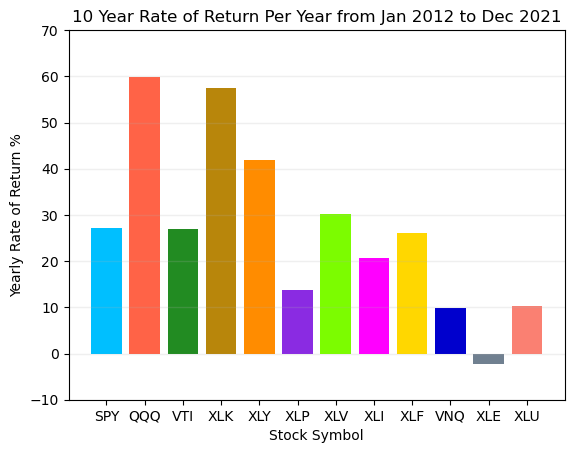

In [256]:
# Extract the 10 Year Rate of Return and Plot it in a Bar Chart
return_10 = returns_10_5_3_1['10 Year Yearly Rate of Return']
color=['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange','blueviolet', 'lawngreen', 'magenta', 'gold' ,'mediumblue', 'slategrey', 'salmon']
# Plot a bar chart using the extracted data from return_10 sourced from returns_10_5_3_1 
plt.bar(return_10.index, return_10.values, color=color)

# Set the title of the chart
plt.title("10 Year Rate of Return Per Year from Jan 2012 to Dec 2021")

# Add labels to the x and y axes
plt.xlabel("Stock Symbol")
plt.ylabel("Yearly Rate of Return %")
plt.ylim(-10, 70)
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis = 'y')

# Show the plot
plt.show()

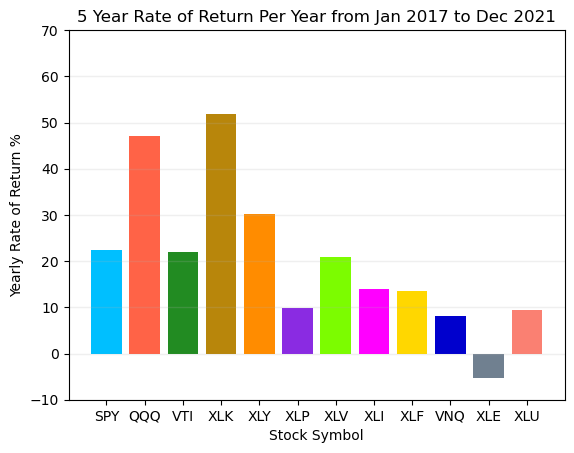

In [257]:
# Extract the 5 Year Rate of Return and Plot it in a Bar Chart
return_5 = returns_10_5_3_1['5 Year Yearly Rate of Return']

# Plot a bar chart using the extracted data from return_5 sourced from returns_10_5_3_1 
plt.bar(return_5.index, return_5.values, color=color)

# Set the title of the chart
plt.title("5 Year Rate of Return Per Year from Jan 2017 to Dec 2021")

# Add labels to the x and y axes
plt.xlabel("Stock Symbol")
plt.ylabel("Yearly Rate of Return %")
plt.ylim(-10, 70)
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis = 'y')

# Show the plot
plt.show()

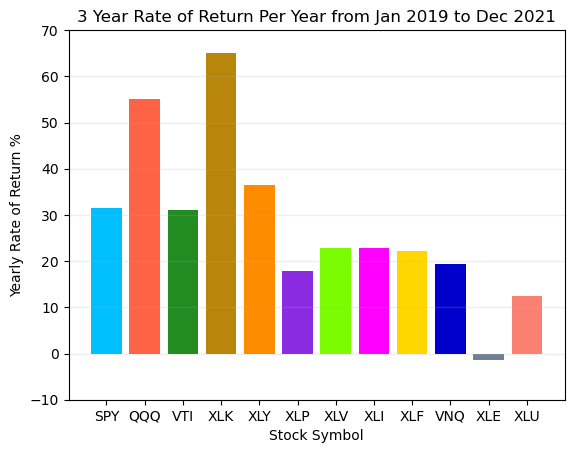

In [258]:
# Extract the 3 Year Rate of Return and Plot it in a Bar Chart
return_3 = returns_10_5_3_1['3 Year Yearly Rate of Return']

# Plot a bar chart using the extracted data from return_3 sourced from returns_10_5_3_1 
plt.bar(return_3.index, return_3.values, color=color)

# Set the title of the chart
plt.title("3 Year Rate of Return Per Year from Jan 2019 to Dec 2021")

# Add labels to the x and y axes
plt.xlabel("Stock Symbol")
plt.ylabel("Yearly Rate of Return %")
plt.ylim(-10, 70)
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis = 'y')

# Show the plot
plt.show()

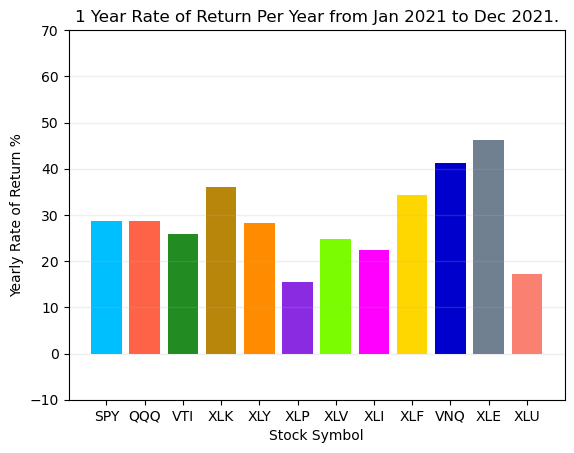

In [259]:
# Extract the 1 Year Rate of Return and Plot it in a Bar Chart
return_1 = returns_10_5_3_1['1 Year Yearly Rate of Return']

# Plot a bar chart using the extracted data from return_1 sourced from returns_10_5_3_1 
plt.bar(return_1.index, return_1.values, color=color)

# Set the title of the chart
plt.title("1 Year Rate of Return Per Year from Jan 2021 to Dec 2021.")

# Add labels to the x and y axes
plt.xlabel("Stock Symbol")
plt.ylabel("Yearly Rate of Return %")
plt.ylim(-10, 70)
plt.grid(linestyle='-', linewidth=1, alpha=0.2, axis = 'y')

# Show the plot
plt.show()

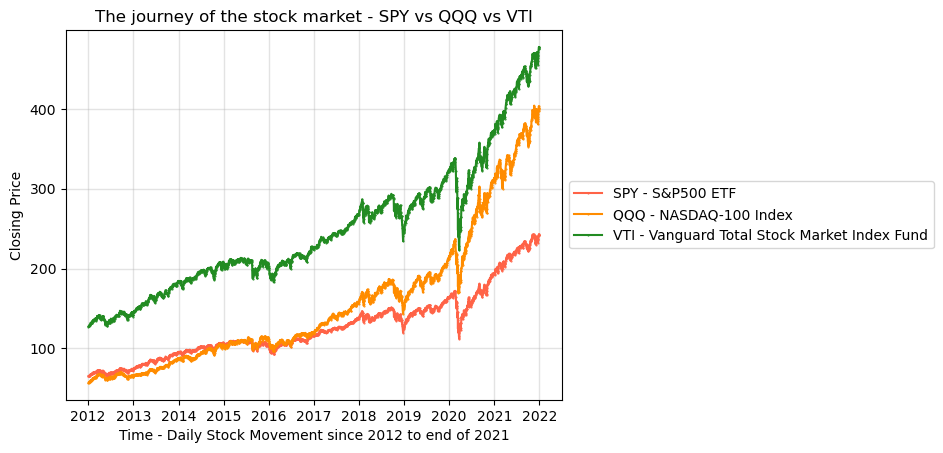

In [260]:
#Plot out the initial info we have to see what we are working with.
marker='o'
color1=['tomato', 'darkorange', 'forestgreen']
for i, ticker in enumerate(tickers1):
    line = data.loc[data["Ticker"] == ticker]
    color2 = color1[i % len(color1)]
    plt.plot(line["Date"], line["Close"], marker=marker, color=color2, markersize=0.5)
    
plt.xlabel("Time - Daily Stock Movement since 2012 to end of 2021")
plt.ylabel("Closing Price")
plt.title(f"The journey of the stock market - {' vs '.join(tickers1)}")
plt.legend(stockstring_expl, loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.grid(linestyle='-', linewidth=1, alpha=0.35)
plt.show()

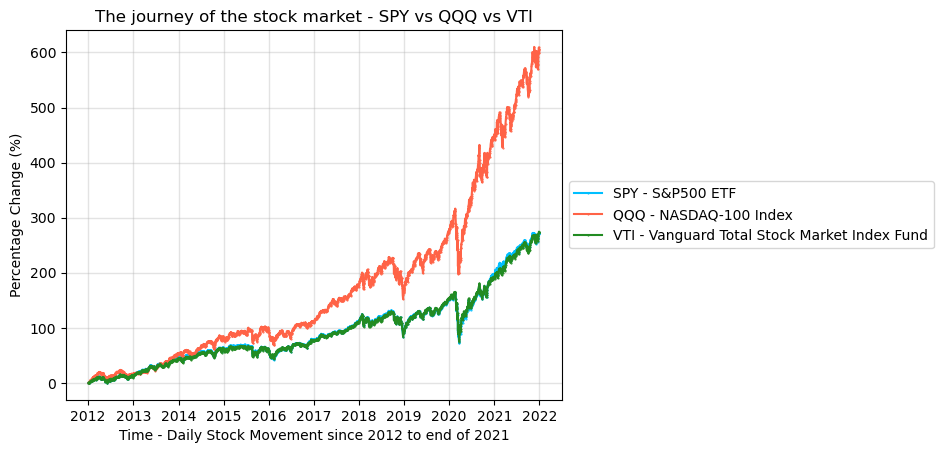

In [261]:
#Plot out the new Cumulative change we calcuated into a Graph that starts at the same point.

color1=['deepskyblue', 'tomato', 'forestgreen']
for i, ticker in enumerate(tickers1):
    line = data.loc[data["Ticker"] == ticker]
    color2 = color1[i % len(color1)]
    plt.plot(line["Date"], line["PercentChange"], marker=marker, color=color2, markersize=0.5)
    
plt.xlabel("Time - Daily Stock Movement since 2012 to end of 2021")
plt.ylabel("Percentage Change (%)")
plt.title(f"The journey of the stock market - {' vs '.join(tickers1)}")
plt.grid(linestyle='-', linewidth=1, alpha=0.35)
plt.legend(stockstring_expl, loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

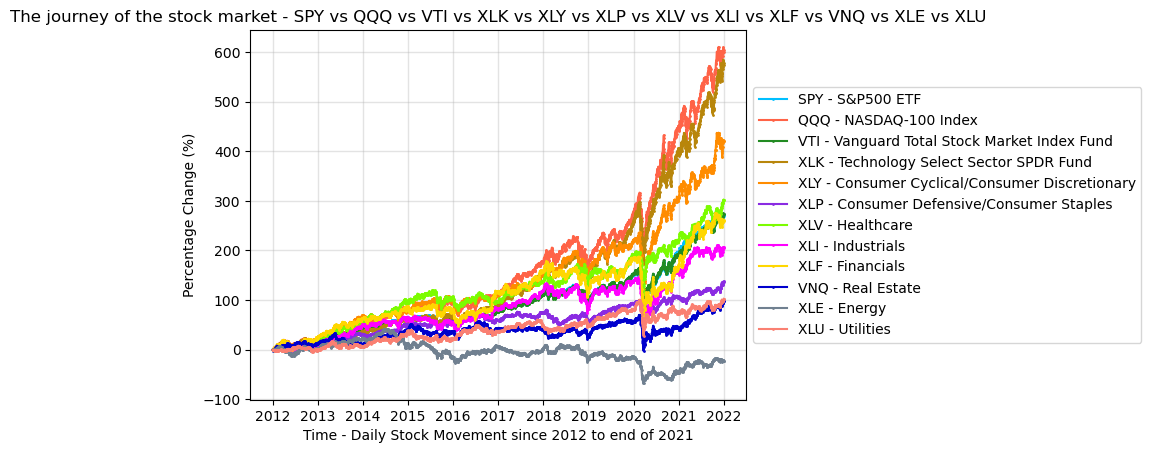

In [262]:
# Starting graphing cumulative change line for all ETFs by different sectors since 2012/01/01.
lines = [data.loc[data["Ticker"] == ticker] for ticker in stockstring]
color=['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange','blueviolet', 'lawngreen', 'magenta', 'gold' ,'mediumblue', 'slategrey', 'salmon']
for i, ticker in enumerate(stockstring):
    line = data.loc[data["Ticker"] == ticker]
    color3 = color[i % len(color)]
    plt.plot(line["Date"], line["PercentChange"], marker=marker, color=color3, markersize=1)

plt.xlabel("Time - Daily Stock Movement since 2012 to end of 2021")
plt.ylabel("Percentage Change (%)")
plt.title(f"The journey of the stock market - {' vs '.join(stockstring)}")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
plt.legend(stockstring_expl, loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

In [263]:
# Create a count of Volumes by ETF so that we can incorporate that into making a Bar chart later.
count = data.groupby("Ticker")
count1 = count["Volume"].sum()
count1

Ticker
QQQ     92844825600
SPY      7376731300
VNQ     10915268600
VTI    255384731400
XLE     45659010000
XLF    147718597737
XLI     29505512200
XLK     26103890200
XLP     26990486000
XLU     33853130900
XLV     22985373200
XLY     13776206500
Name: Volume, dtype: int64

In [264]:
print(stockstring_expl)

['SPY - S&P500 ETF', 'QQQ - NASDAQ-100 Index', 'VTI - Vanguard Total Stock Market Index Fund', 'XLK - Technology Select Sector SPDR Fund', 'XLY - Consumer Cyclical/Consumer Discretionary', 'XLP - Consumer Defensive/Consumer Staples', 'XLV - Healthcare', 'XLI - Industrials', 'XLF - Financials', 'VNQ - Real Estate', 'XLE - Energy', 'XLU - Utilities']


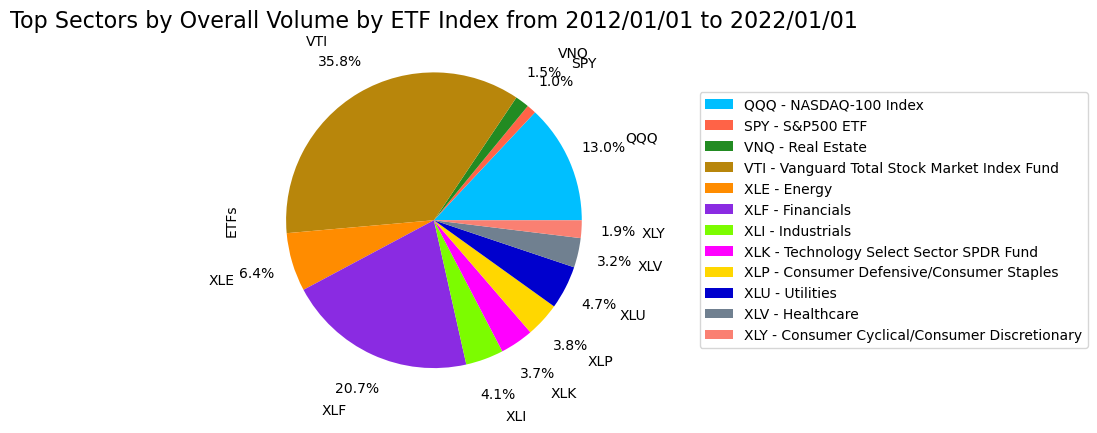

In [265]:
# Create Pie Chart by Top 10 Sectors by Volume.
color = ['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange','blueviolet', 'lawngreen', 'magenta', 'gold' ,'mediumblue', 'slategrey', 'salmon']
stockstring2 = ['QQQ', 'SPY', 'VNQ','VTI', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
stockstring_exp2 = ['QQQ - NASDAQ-100 Index', 'SPY - S&P500 ETF', 'VNQ - Real Estate', 'VTI - Vanguard Total Stock Market Index Fund', 'XLE - Energy', 'XLF - Financials', 'XLI - Industrials', 'XLK - Technology Select Sector SPDR Fund', 'XLP - Consumer Defensive/Consumer Staples', 'XLU - Utilities', 'XLV - Healthcare','XLY - Consumer Cyclical/Consumer Discretionary']
plt.pie(count1, labels=stockstring2, autopct='%1.1f%%', pctdistance=1.25, labeldistance=1.41, colors=color)
plt.ylabel("ETFs")
plt.title("Top Sectors by Overall Volume by ETF Index from 2012/01/01 to 2022/01/01", fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), labels=stockstring_exp2)
plt.show()

In [266]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,PercentChange
0,2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269039,2230400,SPY,0.000000
1,2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293552,1647400,SPY,0.046003
2,2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530453,1146300,SPY,0.490722
3,2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407898,1640000,SPY,0.260693
4,2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530453,1978900,SPY,0.490722


In [267]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,PercentChange
2512,2021-12-27 00:00:00-05:00,69.750000,70.059998,69.540001,70.059998,68.021416,7853700,XLU,98.245606
2513,2021-12-28 00:00:00-05:00,70.160004,70.709999,70.110001,70.690002,68.633080,8052000,XLU,100.028303
2514,2021-12-29 00:00:00-05:00,70.769997,71.180000,70.650002,71.070000,69.002029,6877700,XLU,101.103564
2515,2021-12-30 00:00:00-05:00,71.260002,71.400002,70.809998,71.330002,69.254471,9336200,XLU,101.839280
2516,2021-12-31 00:00:00-05:00,71.180000,71.830002,71.040001,71.580002,69.497192,9309400,XLU,102.546694


In [268]:
returns_10_5_3_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, SPY to XLU
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   10 Year Yearly Rate of Return  12 non-null     float64
 1   5 Year Yearly Rate of Return   12 non-null     float64
 2   3 Year Yearly Rate of Return   12 non-null     float64
 3   1 Year Yearly Rate of Return   12 non-null     float64
dtypes: float64(4)
memory usage: 480.0+ bytes


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30204 entries, 0 to 2516
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype                           
---  ------         --------------  -----                           
 0   Date           30204 non-null  datetime64[ns, America/New_York]
 1   Open           30204 non-null  float64                         
 2   High           30204 non-null  float64                         
 3   Low            30204 non-null  float64                         
 4   Close          30204 non-null  float64                         
 5   Adj Close      30204 non-null  float64                         
 6   Volume         30204 non-null  int64                           
 7   Ticker         30204 non-null  object                          
 8   PercentChange  30204 non-null  float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1), object(1)
memory usage: 2.3+ MB


In [270]:
# look at stats to see if anything additional pops out from our data set.
returns_10_5_3_1.describe()

,10 Year Yearly Rate of Return,5 Year Yearly Rate of Return,3 Year Yearly Rate of Return,1 Year Yearly Rate of Return
count,12.000000,12.000000,12.000000,12.000000
mean,26.831682,20.357633,27.972204,29.081606
std,18.786183,16.348591,18.028319,9.115173
min,-2.188600,-5.262878,-1.381693,15.572541
25%,12.880211,9.736761,18.950353,24.165233
50%,26.529947,17.442396,22.893160,28.432440
75%,33.058998,24.429971,32.744354,34.699081
max,59.920913,51.906531,65.081789,46.206537


In [271]:
# Last check of Data to make sure counts etc arent out of order and nothing jumps out as an error.
data.describe()

,Open,High,Low,Close,Adj Close,Volume,PercentChange
count,30204.000000,30204.000000,30204.000000,30204.000000,30204.000000,3.020400e+04,30204.000000
mean,91.909244,92.442872,91.324879,91.922110,83.007658,2.360991e+07,91.910833
std,70.938949,71.310774,70.515301,70.951362,69.416935,3.350156e+07,93.697883
min,10.706742,10.844842,10.658002,10.804224,8.771102,5.524000e+05,-66.826181
25%,49.847499,50.169998,49.509998,49.830002,42.269093,5.554200e+06,30.063188
50%,71.220001,71.645000,70.769997,71.239998,60.642250,1.055640e+07,66.909486
75%,105.220001,105.860001,104.652502,105.260002,98.596539,2.551400e+07,124.514478
max,477.929993,479.000000,476.059998,477.480011,469.857391,5.072443e+08,609.999964


In [272]:
QQQ.tail(252)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,PercentChange
2265,2021-01-04 00:00:00-05:00,315.109985,315.290009,305.179993,309.309998,305.575012,45305900,QQQ,443.602793
2266,2021-01-05 00:00:00-05:00,308.290009,312.140015,308.290009,311.859985,308.094238,29323400,QQQ,448.084318
2267,2021-01-06 00:00:00-05:00,307.000000,311.880005,305.980011,307.540009,303.826447,52809600,QQQ,440.492092
2268,2021-01-07 00:00:00-05:00,310.279999,315.839996,310.250000,314.980011,311.176605,30394800,QQQ,453.567667
2269,2021-01-08 00:00:00-05:00,317.339996,319.390015,315.079987,319.029999,315.177673,33955800,QQQ,460.685396
...,...,...,...,...,...,...,...,...,...
2512,2021-12-27 00:00:00-05:00,398.250000,403.480011,398.220001,403.480011,400.528290,32820700,QQQ,609.103691
2513,2021-12-28 00:00:00-05:00,404.399994,404.579987,400.709991,401.609985,398.671875,33113700,QQQ,605.817179
2514,2021-12-29 00:00:00-05:00,401.750000,403.049988,399.109985,401.549988,398.612366,32248500,QQQ,605.711735
2515,2021-12-30 00:00:00-05:00,401.329987,403.570007,399.750000,400.350006,397.421143,23850100,QQQ,603.602804


In [273]:
# Attempts to figure out some kind of correlation but not successful in terms of knowledge of the scope about how to do this. If we were to proceed to find correlation/
# in the future we would have to find out more about how that works and what variables to use to make it meaningful.

# # Calculate the correlation coefficient and linear regression model
# correlation = st.pearsonr(data['PercentChange'],data['Volume'])
# print(f"The correlation between the Percent Change and the Volume is {round(correlation[0],2)}")
# #Correlation graph
# (slope, intercept,rvalue, pvalue, stderr)= st.linregress(data['PercentChange'],data['Volume'])
# regress_values=data["PercentChange"]* slope + intercept
# line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
# plt.scatter(data["PercentChange"],data["Volume"],color='b')
# plt.plot(data["PercentChange"], regress_values, color='red')
# plt.annotate(line_eq,(20,36), fontsize=15)
# plt.xlabel("PercentChange")
# plt.ylabel("Volume")
# plt.title("Percent Change vs Volume")
# print(f"The r-squared is: {round(rvalue**2,3)}")
# plt.show()

In [274]:
spreadsheet.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [275]:
narrowspreadsheet = spreadsheet[['Name', 'Sector', 'Market Cap']]

narrowspreadsheet

,Name,Sector,Market Cap
0,3M Company,Industrials,138721055226
1,A.O. Smith Corp,Industrials,10783419933
2,Abbott Laboratories,Health Care,102121042306
3,AbbVie Inc.,Health Care,181386347059
4,Accenture plc,Information Technology,98765855553
...,...,...,...
500,Xylem Inc.,Industrials,12915021000
501,Yum! Brands Inc,Consumer Discretionary,27003303098
502,Zimmer Biomet Holdings,Health Care,24454698119
503,Zions Bancorp,Financials,10670678640


In [276]:
top10 = narrowspreadsheet[['Name', 'Sector', 'Market Cap']]
top_10_sectors = narrowspreadsheet.groupby('Sector').agg({'Name': 'first', 'Market Cap': 'sum'}).nlargest(10, 'Market Cap')

print(top_10_sectors)

                                                       Name     Market Cap
Sector                                                                    
Information Technology                        Accenture plc  6727121800912
Financials                    Affiliated Managers Group Inc  3442649464852
Health Care                             Abbott Laboratories  3244359043367
Consumer Discretionary                   Advance Auto Parts  3213562747315
Industrials                                      3M Company  2411541173034
Consumer Staples                           Altria Group Inc  2087076388082
Energy                              Anadarko Petroleum Corp  1357313712749
Materials                      Air Products & Chemicals Inc   692300259151
Real Estate             Alexandria Real Estate Equities Inc   625315677562
Utilities                                          AES Corp   611632638471


In [277]:
# Not used chart
# sns.set_style("whitegrid")
# top_10_sectors = narrowspreadsheet.groupby('Sector').sum().nlargest(10, 'Market Cap')
# sns.barplot(x=top_10_sectors.index, y='Market Cap', data=top_10_sectors)
# plt.xlabel("Sector", fontsize=12)
# plt.ylabel("Market Cap (in Billions)", fontsize=12)
# plt.xticks(rotation=90, fontsize=12)
# plt.title("Top 10 Sectors by Market Cap", fontsize=16)
# plt.show()

In [278]:

dividend_yield = spreadsheet

dividend_yield

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [279]:

dividend = dividend_yield.groupby('Sector')['Dividend Yield'].mean()

In [280]:

dividend.sort_values(ascending=False, inplace=True)

In [281]:

dividend.sort_values(ascending=False, inplace=True)
print(dividend)

Sector
Telecommunication Services    7.567797
Real Estate                   3.894758
Utilities                     3.759224
Consumer Staples              2.433391
Financials                    2.017241
Energy                        2.014452
Materials                     1.737976
Consumer Discretionary        1.572412
Industrials                   1.479392
Information Technology        1.228494
Health Care                   0.917243
Name: Dividend Yield, dtype: float64


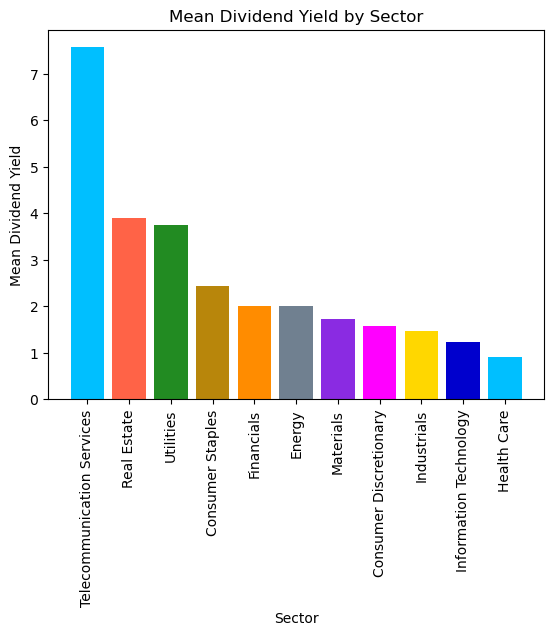

In [282]:
# Create a bar plot using seaborn

colors = ['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange', 'slategrey','blueviolet', 'magenta', 'gold' ,'mediumblue']

fig, ax = plt.subplots()

ax.bar(dividend.keys(), dividend.values, color=colors)

plt.title('Mean Dividend Yield by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Dividend Yield')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

In [283]:
# Not using
# price_to_book = spreadsheet.groupby('Sector')['Price/Book'].mean()

In [284]:
# Not using
# price_to_book.sort_values(ascending=False, inplace=True)

In [285]:
# Another Chart we wont use.
# sns.barplot(x=price_to_book.index, y=price_to_book.values)

# plt.title('Mean Price/Book Ratio by Sector')
# plt.xlabel('Sector')
# plt.ylabel('Mean Price/Book Ratio')
# plt.xticks(rotation=90)

# plt.show()

In [286]:

spreadsheet

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


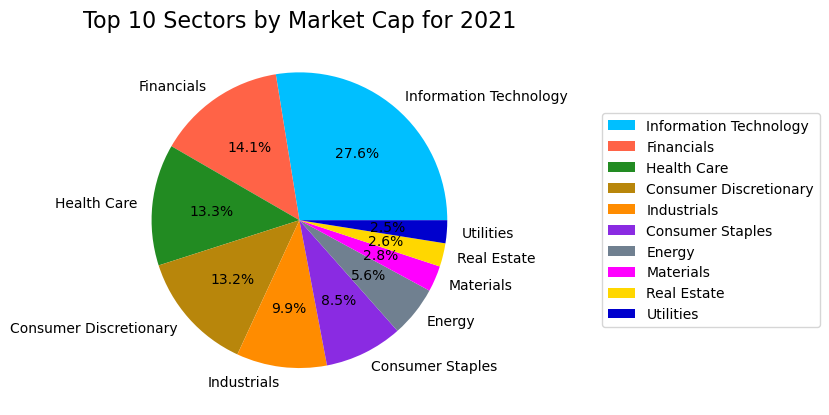

In [287]:
# Create Pie Chart by Top 10 Sectors by Market Cap.
color = ['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange','blueviolet', 'slategrey', 'magenta', 'gold' ,'mediumblue']

top_10_sectors = narrowspreadsheet.groupby('Sector').sum().nlargest(10, 'Market Cap')
top_10_sectors_sum = top_10_sectors['Market Cap'].sum()
top_10_sectors['Percentage'] = top_10_sectors['Market Cap'] / top_10_sectors_sum * 100
top_10_sectors = top_10_sectors.reset_index()

fig, ax = plt.subplots()
ax.pie(top_10_sectors['Percentage'], labels=top_10_sectors['Sector'], autopct='%1.1f%%', colors=color)
plt.title("Top 10 Sectors by Market Cap for 2021", fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5), labels=top_10_sectors['Sector'])
plt.show()